# Description

This project aims to **forecast website traffic using Python**, employing time series forecasting methods to uncover patterns and predict future trends. The dataset contains daily traffic data from `thecleverprogrammer.com`, collected between **June 2021** and **June 2022**. 

By analyzing and modeling this data, the project demonstrates the application of statistical and machine learning techniques to accurately predict future website visits, providing insights into traffic behavior over time.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

print("Done")

Done


# Load Dataset

In [25]:
path = r'D:\Data_Projects\Website-Traffic-Forecasting\Src\Data\Thecleverprogrammer.csv'
data = pd.read_csv(path)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [27]:
data.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


Here, I want to change the dtype the `data` column from object to **datatime** 

In [28]:
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')

Daily Traffic Trend:

Plot the time series of daily views to observe trends and seasonality

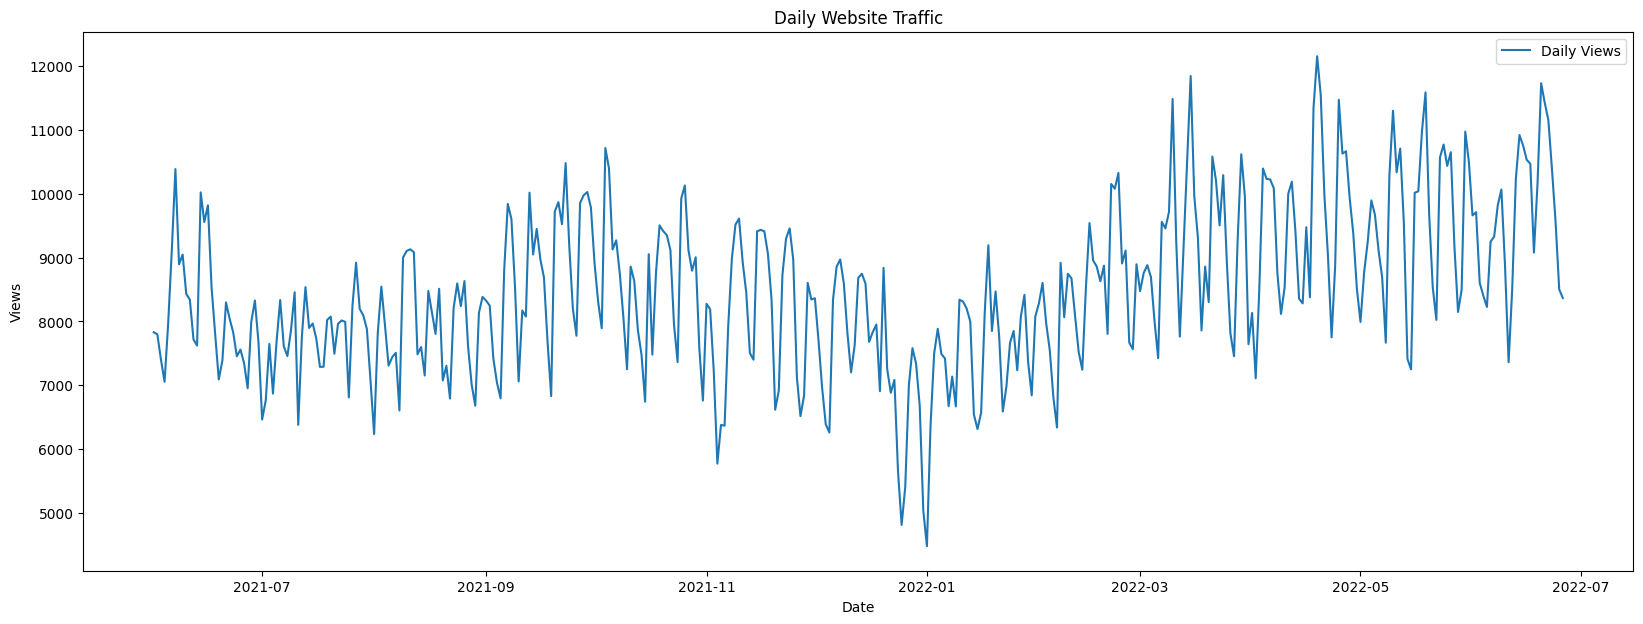

In [29]:
plt.figure(figsize=(20,7))
plt.plot(data['Date'],data['Views'],label = 'Daily Views')
plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Daily Website Traffic')
plt.legend()
plt.show()

Monthly or Weekly Averages:

Aggregate data by week or month to identify broader trends

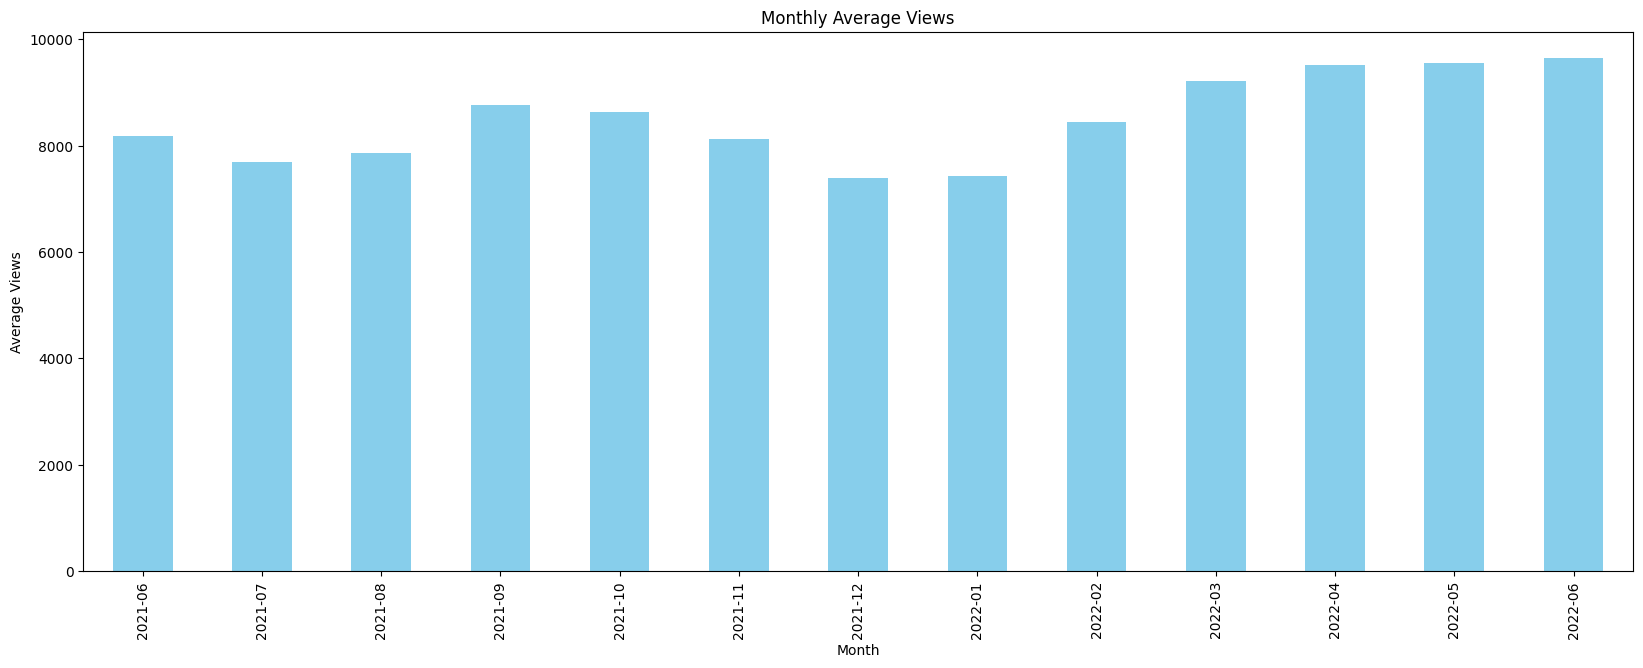

In [30]:
data['Month'] = data['Date'].dt.to_period('M')
monthly_avg = data.groupby('Month')['Views'].mean()

plt.figure(figsize=(20, 7))

monthly_avg.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Views')
plt.title('Monthly Average Views')
plt.show()

Day of the Week Analysis:

Find if certain days receive more traffic than others

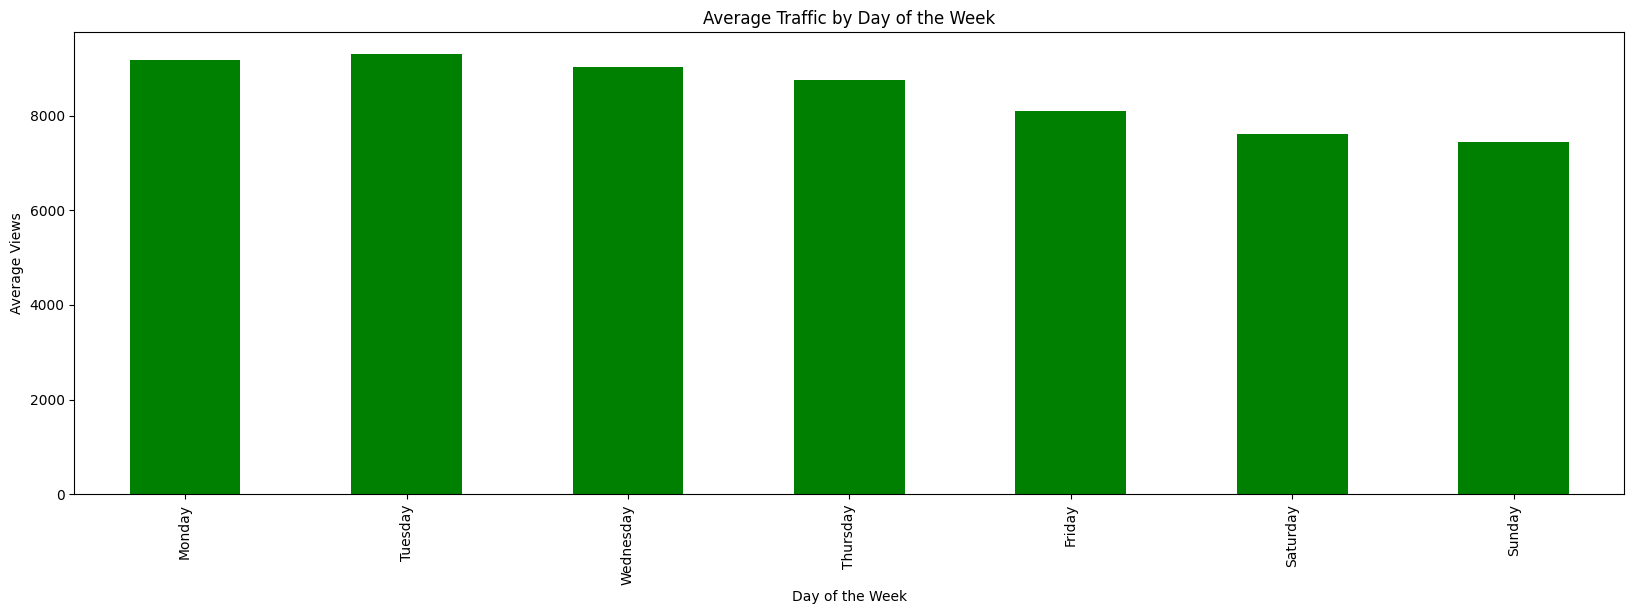

In [31]:
data['DayOfWeek'] = data['Date'].dt.day_name()
weekday_avg = data.groupby('DayOfWeek')['Views'].mean()

plt.figure(figsize=(20, 6))
weekday_avg = weekday_avg.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_avg.plot(kind='bar', color='green')
plt.xlabel('Day of the Week')
plt.ylabel('Average Views')
plt.title('Average Traffic by Day of the Week')
plt.show()

Yearly or Monthly Seasonality:

Use boxplots to show seasonality or patterns over months

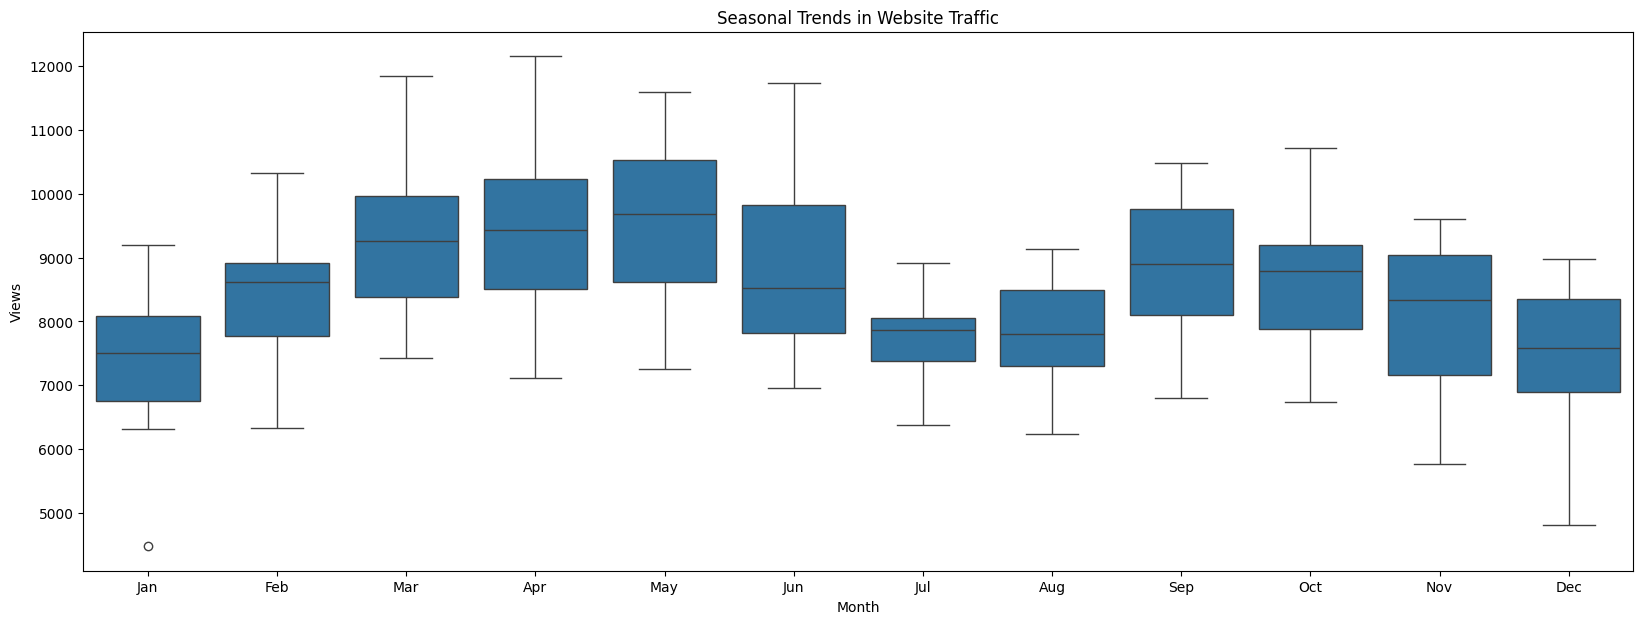

In [32]:
data['MonthName'] = data['Date'].dt.strftime('%b')

plt.figure(figsize=(20, 7))
sns.boxplot(x='MonthName', y='Views', data=data, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Views')
plt.title('Seasonal Trends in Website Traffic')
plt.show()

Find Outliers in Daily Traffic:

Use a boxplot to detect unusually high or low traffic days

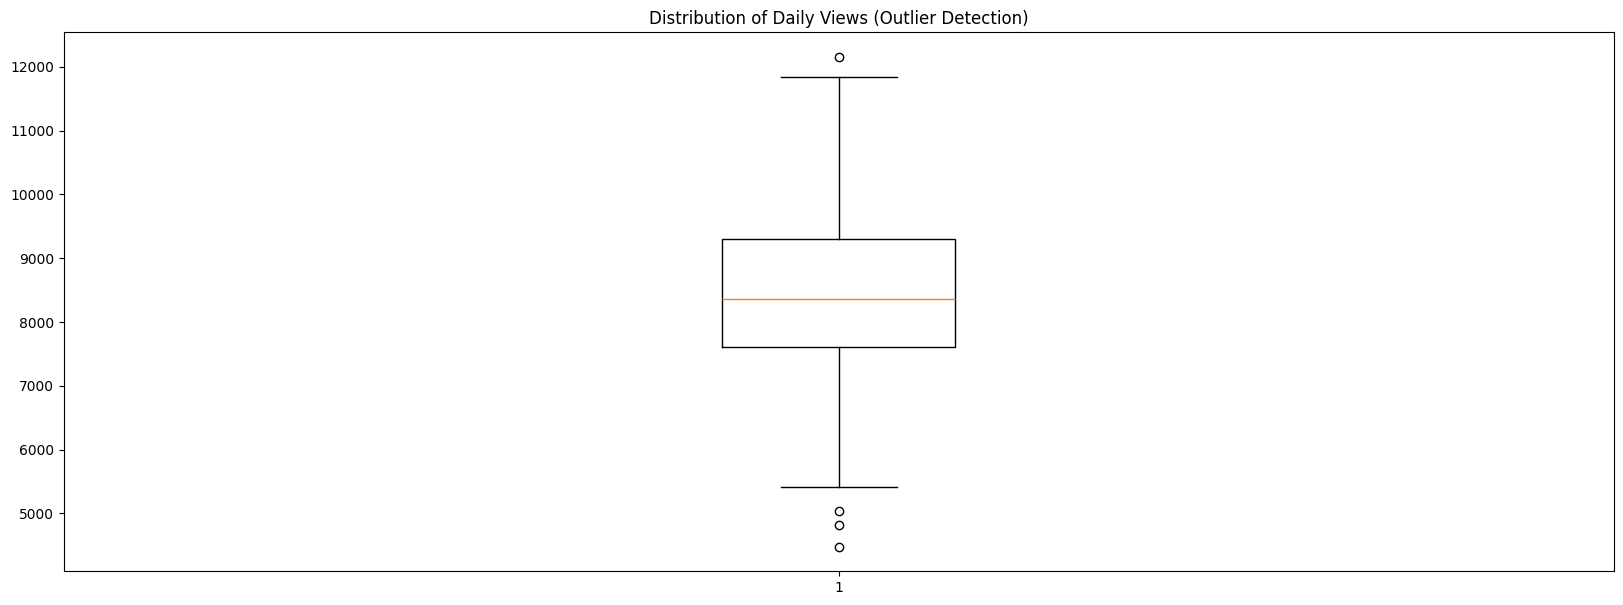

In [33]:
plt.figure(figsize=(20,7))
plt.boxplot(x=data['Views'])
plt.title('Distribution of Daily Views (Outlier Detection)')
plt.show()

* **Median Traffic**: The orange line inside the box represents the median daily traffic, showing the central tendency.

* **Spread of Traffic**: The box (Interquartile Range, IQR) shows the middle 50% of daily traffic, with most days falling in this range.

* **Outliers**: The dots above and below the whiskers represent days with unusually high or low traffic, highlighting significant deviations.

* **Maximum and Minimum Range**: The whiskers extend to the most extreme values within 1.5 times the IQR, beyond which outliers occur.

Highlight Sudden Spikes/Dips:

Identify days where traffic deviated significantly from the average

In [34]:
mean_traffic = data['Views'].mean()
std_traffic = data['Views'].std()
data['Anomaly'] = (data['Views'] > mean_traffic + 3*std_traffic) | (data['Views'] < mean_traffic - 3*std_traffic)

anomalies = data[data['Anomaly']]
print(anomalies)

          Date  Views    Month DayOfWeek MonthName  Anomaly
214 2022-01-01   4478  2022-01  Saturday       Jan     True


The script identifies anomalies in website traffic by flagging day where the traffic deviates significantly from the average **(more than 3 standard deviations)**. 

These anomalies may indicate unusual events, such as promotions or technical issues affecting traffic patterns.

Heatmap of Traffic by Weekday and Month:

Combine day of the week and month for a heatmap

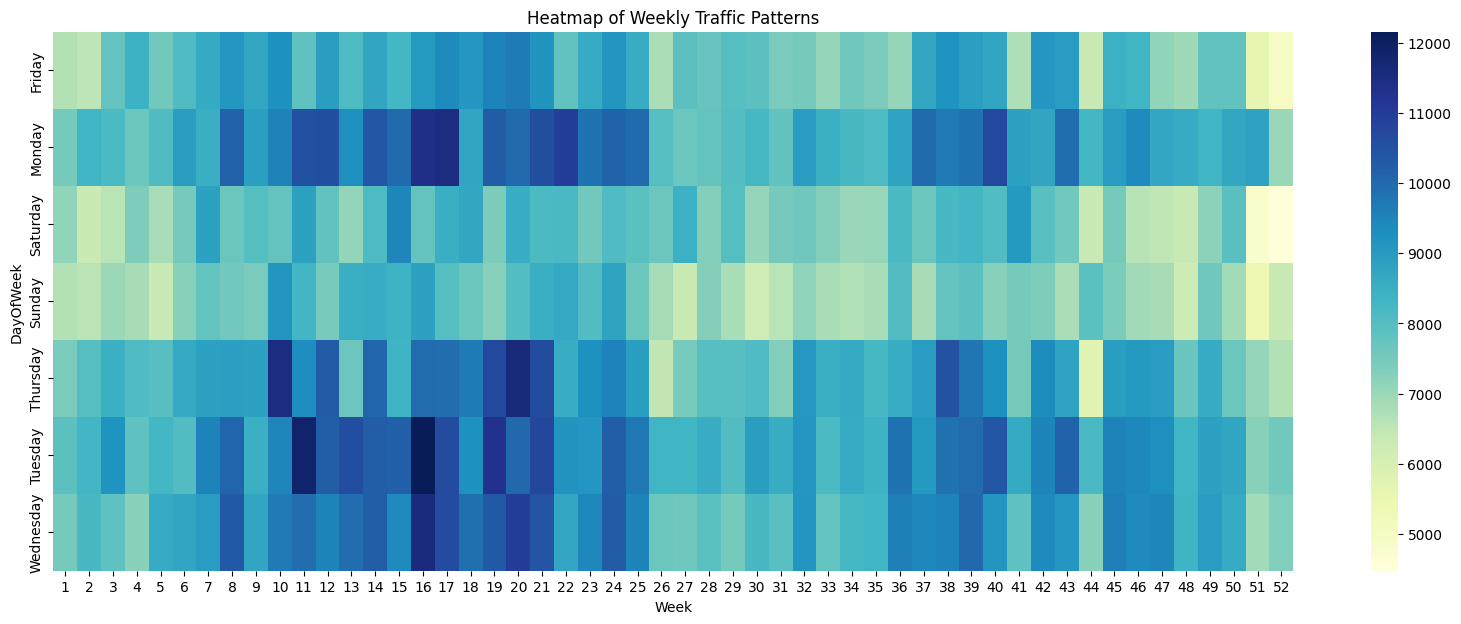

In [35]:
data['Week'] = data['Date'].dt.isocalendar().week
traffic_heatmap = data.pivot_table(values='Views', index='DayOfWeek', columns='Week', aggfunc='mean')

plt.figure(figsize=(20, 7))
sns.heatmap(traffic_heatmap, cmap='YlGnBu', annot=False)
plt.title('Heatmap of Weekly Traffic Patterns')
plt.show()

Cumulative Traffic Over Time:

Show how traffic accumulates over time

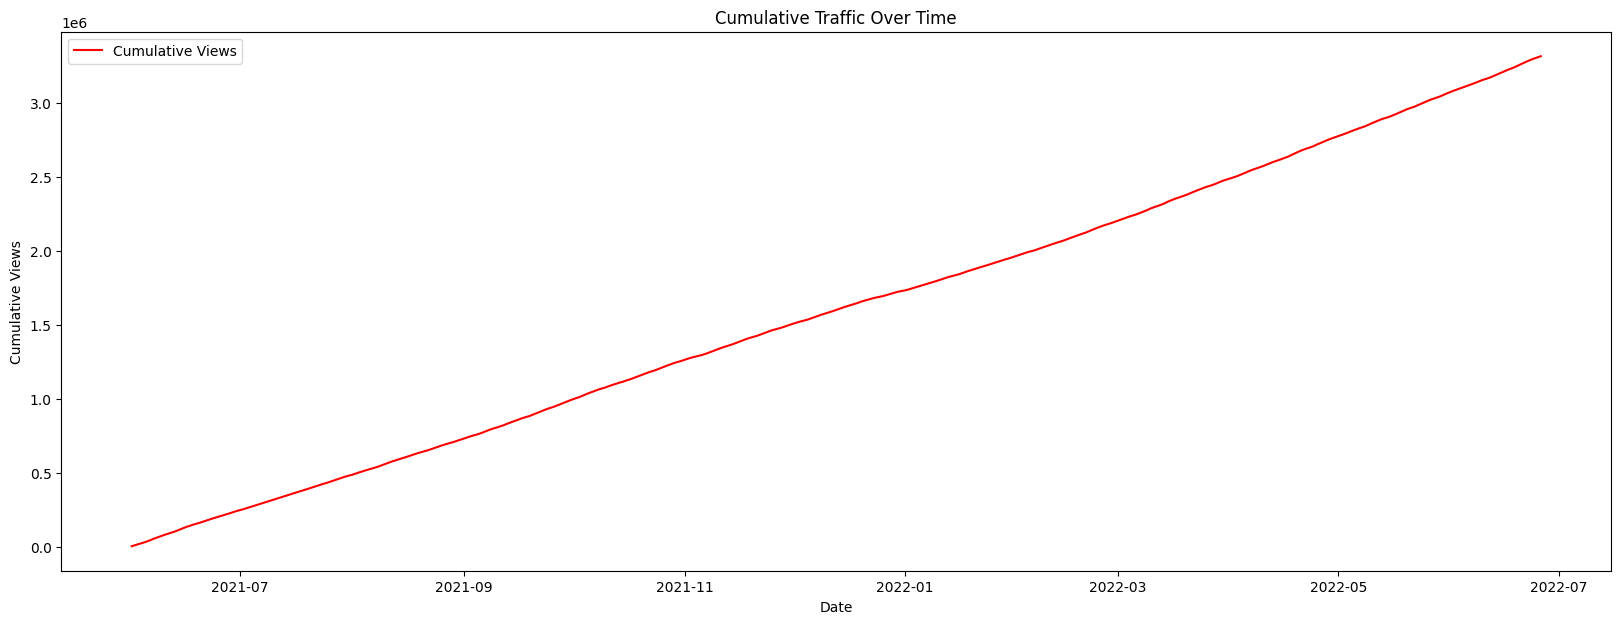

In [36]:
data['Cumulative Views'] = data['Views'].cumsum()

plt.figure(figsize=(20, 7))
plt.plot(data['Date'], data['Cumulative Views'], label='Cumulative Views', color='Red')
plt.xlabel('Date')
plt.ylabel('Cumulative Views')
plt.title('Cumulative Traffic Over Time')
plt.legend()
plt.show()

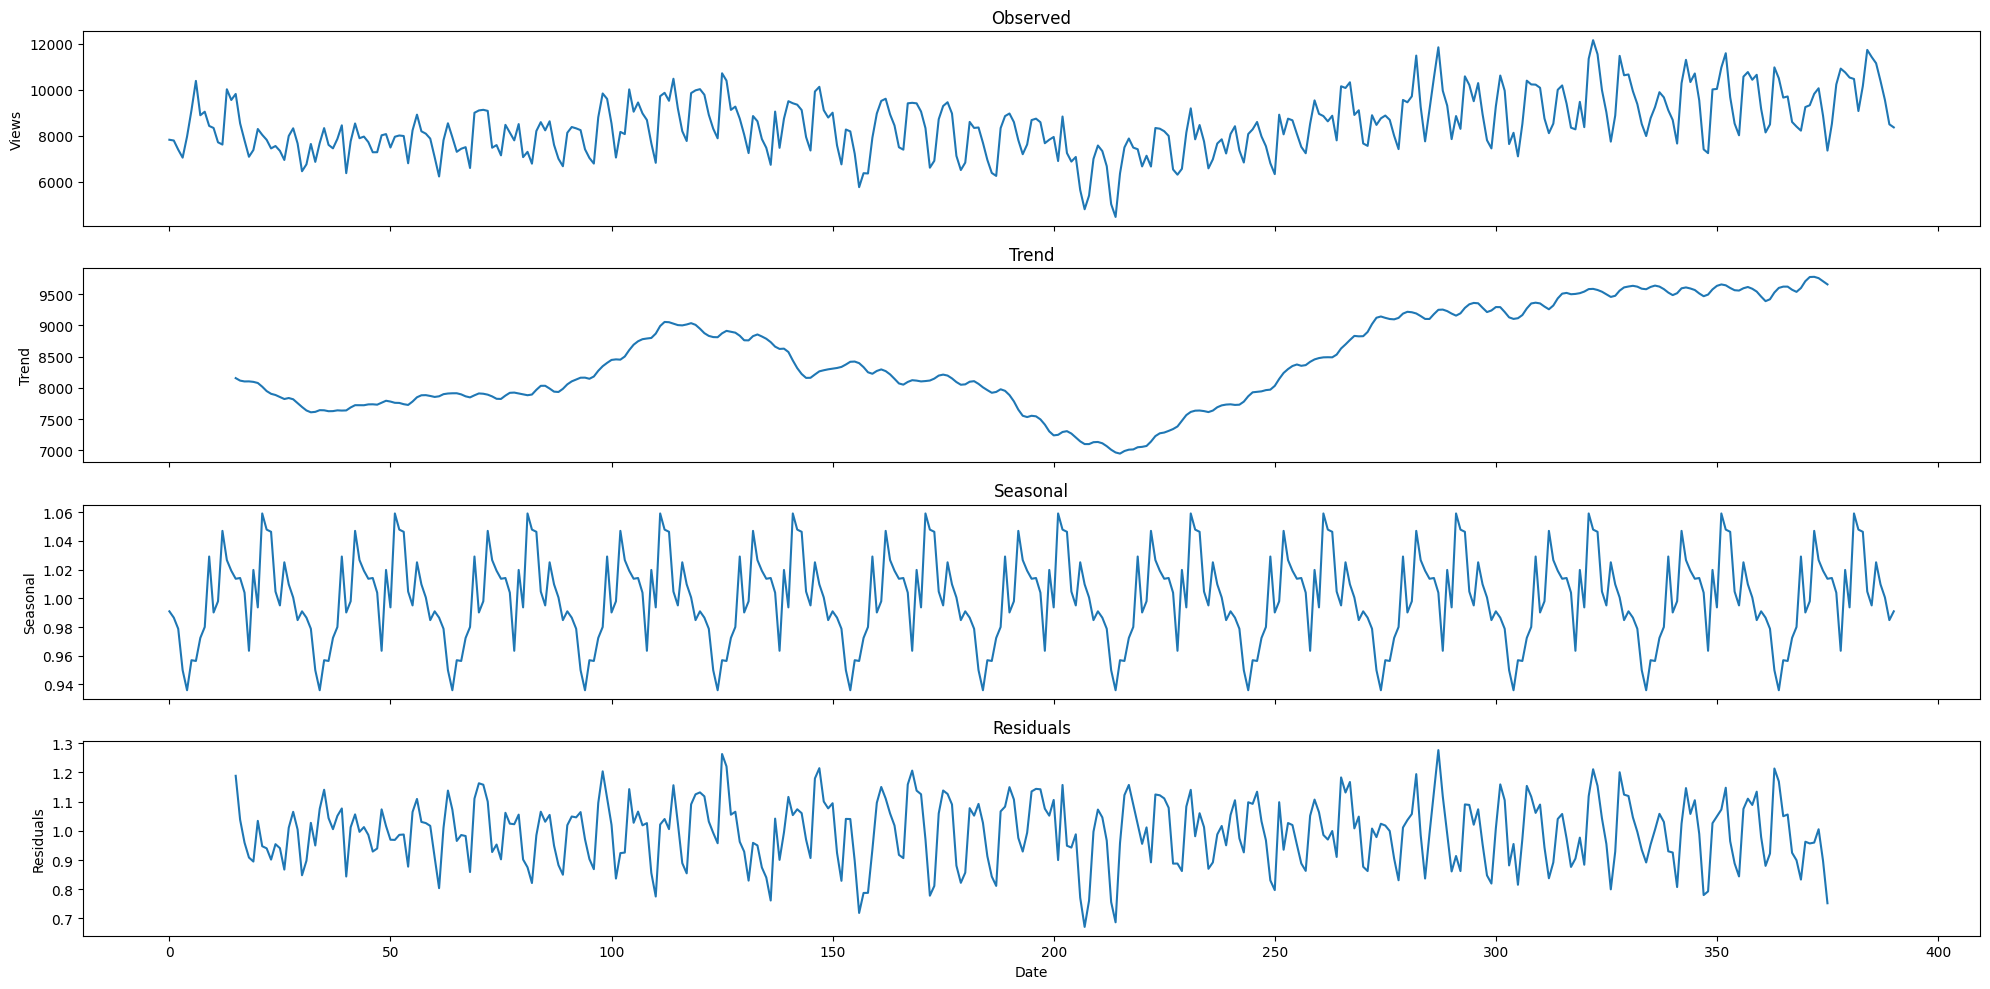

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            period=30)

fig, axes = plt.subplots(4, 1, figsize=(20, 10), sharex=True)
result.observed.plot(ax=axes[0], title="Observed", legend=False)
result.trend.plot(ax=axes[1], title="Trend", legend=False)
result.seasonal.plot(ax=axes[2], title="Seasonal", legend=False)
result.resid.plot(ax=axes[3], title="Residuals", legend=False)

axes[0].set_ylabel("Views")
axes[1].set_ylabel("Trend")
axes[2].set_ylabel("Seasonal")
axes[3].set_ylabel("Residuals")
axes[-1].set_xlabel("Date")

plt.tight_layout()
plt.show()

1. **Observed**

What It Shows: The raw data representing daily website traffic.

**Analysis:**

* There are noticeable fluctuations in daily traffic.

* Periodic increases and decreases suggest a recurring pattern, possibly tied to user behavior or external events.

* There are peaks and dips, which might correspond to specific high-activity days (e.g., marketing campaigns or holidays).

2. **Trend**

**What It Shows**: The long-term movement in the data after removing short-term variations.

**Analysis:**

* The traffic starts with a slight decline early in the series but gradually increases over time.

* A clear upward trend is visible in the latter part of the data, which may indicate:

    * Increased website popularity.
    * Successful marketing strategies or external events driving more visitors.

3. **Seasonal**

**What It Shows**: Regular cyclical patterns in the data, showing repetitive changes over time (e.g., weekly or monthly cycles).

**Analysis:**

* The clear oscillations suggest a strong seasonality in website traffic.

* This could indicate:

    * Weekly patterns (e.g., higher traffic on specific days like weekends or weekdays).
    * Monthly or periodic cycles driven by user behavior or scheduled events.
    * Seasonal patterns are consistent across the dataset, showing predictability in user activity.

4. **Residuals**

**What It Shows**: The remaining random noise or anomalies after accounting for the trend and seasonality.

**Analysis:**

* Residuals appear centered around zero, indicating a good fit between the trend and seasonal components with the observed data.

* Some larger deviations may represent:

    * Outlier events (e.g., unexpected spikes or dips in traffic due to promotions, outages, or viral content).
    * Irregular traffic behavior not captured by the model.

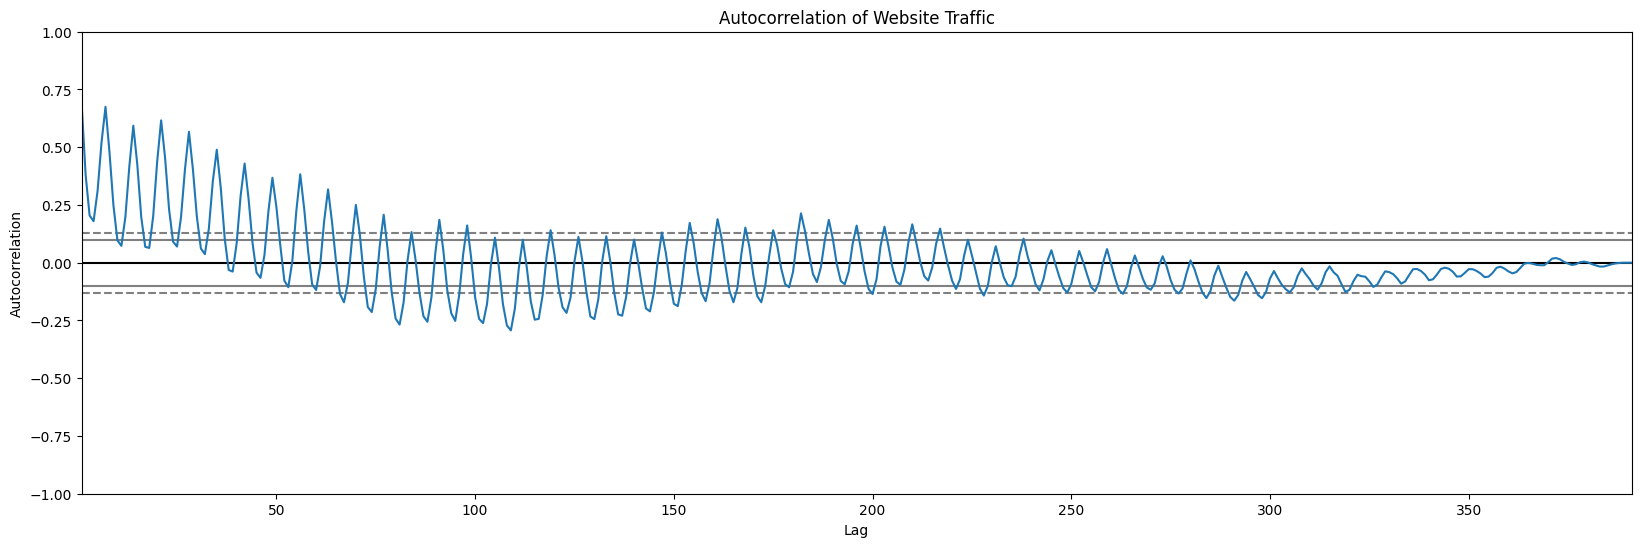

In [38]:
plt.figure(figsize=(20, 6))
pd.plotting.autocorrelation_plot(data["Views"])
plt.title('Autocorrelation of Website Traffic')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

The **autocorrelation** plot reveals the following:

* **Seasonality**: Clear repeating patterns, likely indicating weekly or monthly cycles in website traffic.

* **Decaying Correlation**: Traffic values are more strongly influenced by recent days, with correlations weakening over time.

* **Significant Peaks**: Statistically significant lags highlight meaningful relationships between past and present traffic values.

This analysis suggests strong seasonal patterns in website traffic, making it suitable for time series models that incorporate seasonality (e.g., **SARIMA** or **Prophet**).

<Figure size 1000x600 with 0 Axes>

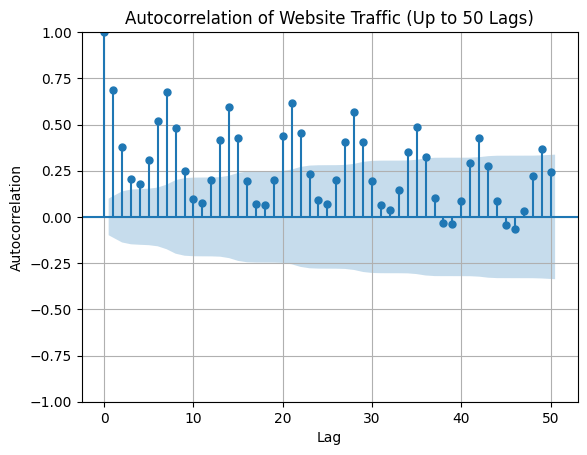

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10,6))

plot_acf(data["Views"], lags=50) 
plt.title('Autocorrelation of Website Traffic (Up to 50 Lags)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

This autocorrelation plot shows:

* **Strong Correlation**: Traffic values are highly correlated for consecutive days (lag 1).

* **Weekly Seasonality**: Peaks at lags 7, 14, 21, etc., indicate a repeating weekly pattern in traffic behavior.

* **Diminishing Influence**: Correlations weaken as the lag increases, reflecting reduced influence of past days.

This analysis highlights **weekly seasonality** and **strong short-term dependence**, making it useful for **time series forecasting**.

<Figure size 2000x600 with 0 Axes>

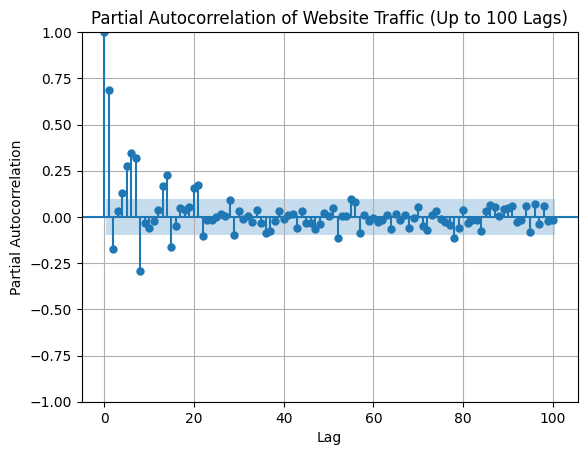

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(20, 6))
plot_pacf(data["Views"], lags=100, method='ywm')  # 'ywm' is a robust method for PACF
plt.title('Partial Autocorrelation of Website Traffic (Up to 100 Lags)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid()
plt.show()

This Partial Autocorrelation Plot **(PACF)** shows:

* **Strong Correlation**: Lag 1 has the highest partial autocorrelation, indicating that today’s traffic is strongly influenced by yesterday’s traffic.

* **Weekly Seasonality**: Significant lags at multiples of 7 suggest recurring weekly patterns in website traffic.

* **Short-Term Influence**: Beyond lag 1 and weekly patterns, the PACF diminishes, reflecting reduced direct influence of distant past values.

This analysis reinforces the importance of weekly seasonality and short-term dependencies, guiding the selection of suitable forecasting models like **SARIMA** or seasonal ARIMA.

# Modeling

In [41]:
import statsmodels.api as sm

p, d, q = 5, 1, 2 
P, D, Q, s = 2, 1, 1, 7 

# Define the model
model = sm.tsa.statespace.SARIMAX(data['Views'],
                                  order=(p, d, q),
                                  seasonal_order=(P, D, Q, s),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

model_fit = model.fit()

print(model_fit.summary())

d:\Data_Projects\Website-Traffic-Forecasting\Web_Traffic_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                               Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(2, 1, [1], 7)   Log Likelihood               -2896.891
Date:                             Sun, 01 Dec 2024   AIC                           5815.782
Time:                                     22:20:02   BIC                           5858.650
Sample:                                          0   HQIC                          5832.820
                                             - 391                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4784      1.024      0.467      0.640      -1.528       2.485
ar.L2          0.0037      

**SARIMAX Model Summary**

Header Information:

Dep. Variable: `Views`

The target variable being modeled (daily website traffic).

No. Observations: `391`

Total number of data points used to fit the model.

Model: `SARIMAX(5, 1, 2)x(2, 1, [1], 7)`

The SARIMA configuration:

`(5, 1, 2)`: Non-seasonal AR (5), differencing (1), and MA (2) terms.

`(2, 1, [1], 7)`: Seasonal AR (2), seasonal differencing (1), seasonal MA (1), with a period of 7 (weekly seasonality).

Log Likelihood: `-2896.891`

Measure of how well the model fits the data. Higher values (closer to 0) are better.

AIC: `5815.782`
Akaike Information Criterion – a metric for model comparison. Lower values indicate a better fit, considering model complexity.

BIC: `5858.650`
Bayesian Information Criterion – like AIC but penalizes more for complexity.

**Coefficient Table:**

**Coefficients**: These are the weights assigned to each AR, MA, and seasonal term.

**P>|z|**: The p-value for testing the null hypothesis that the coefficient equals 0.

**Key Findings:**

* Many coefficients have high p-values (e.g., `ar.L1`, `ar.S.L7`), meaning they might not significantly contribute to the model.

* The seasonal MA term (`ma.S.L7`) is highly significant (p = 0.000) and important for capturing weekly seasonality.

* Variance (`sigma2`): The model estimates the noise variance in the data as `7.402e+05`.

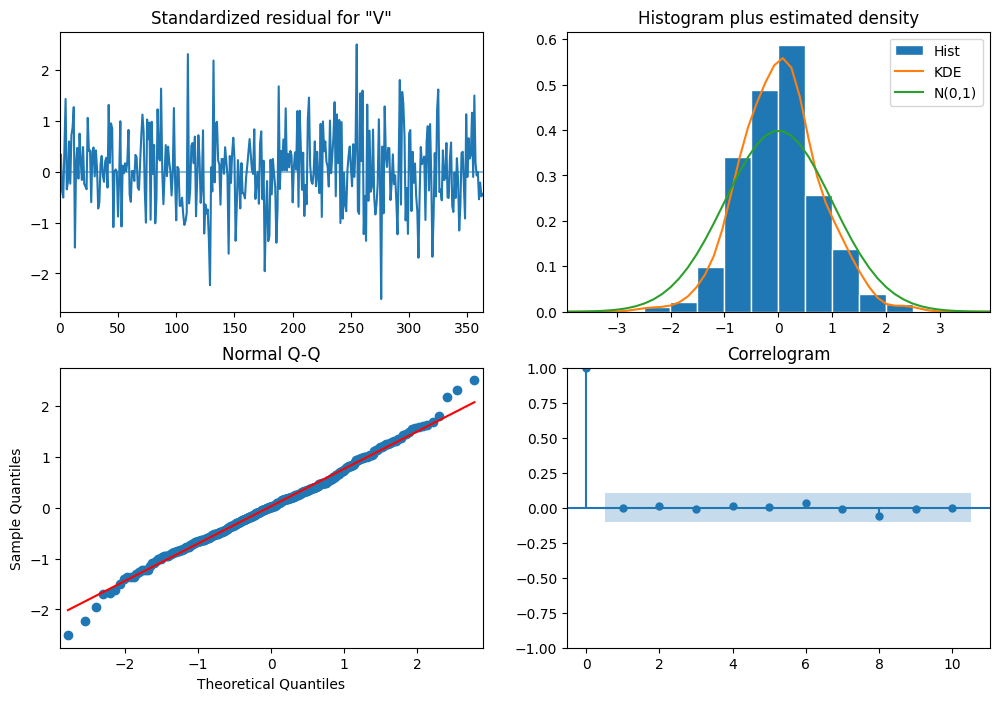

In [42]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

Top Left – **Standardized Residuals**:

Residuals (differences between observed and predicted values) are plotted over time.

Analysis:

* The residuals appear to fluctuate randomly around 0, indicating no obvious patterns or trends.
* This suggests that the model captures the trend and seasonality well.

Top Right – **Histogram of Residuals**:

Shows the distribution of residuals.

Analysis:

* The residuals roughly follow a normal distribution, as indicated by the KDE (orange line) overlapping with the theoretical normal curve (green line).
* Deviations from normality could indicate unmodeled behavior.

Bottom Left – **Normal Q-Q Plot**:

Compares the distribution of residuals to a normal distribution.

Analysis:

* Most points fall along the red line, supporting the assumption that residuals are approximately normal.
* Outliers at the extremes (far ends) indicate a few unusual observations.

Bottom Right – **Correlogram**:

Autocorrelation of residuals at different lags.

Analysis:

* Residuals show no significant autocorrelation (all points fall within the blue confidence interval), confirming the model effectively accounts for serial dependence.

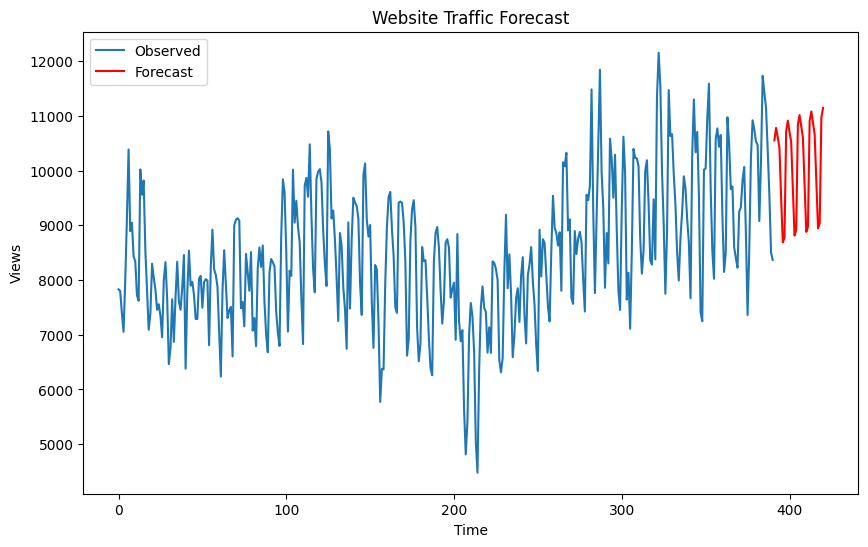

In [43]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(data['Views'], label='Observed')
plt.plot(range(len(data), len(data) + forecast_steps), forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Views')
plt.title('Website Traffic Forecast')
plt.legend()
plt.show()

**Forecast Plot**

* Blue Line (Observed): Actual website traffic data.
* Red Line (Forecast): Predicted future traffic.

**Analysis:**

* The forecast aligns with the observed seasonal patterns (e.g., weekly oscillations).
* The model captures the general trend and seasonality well.

In [45]:
from itertools import product
import warnings

warnings.filterwarnings("ignore")

p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = [7]  

param_combinations = list(product(p, d, q, P, D, Q, s))

best_aic = float('inf')
best_params = None

for params in param_combinations:
    try:
        model = sm.tsa.statespace.SARIMAX(data['Views'],
                                          order=(params[0], params[1], params[2]),
                                          seasonal_order=(params[3], params[4], params[5], params[6]))
        model_fit = model.fit(disp=False)
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_params = params
    except:
        continue

print(f'Best Parameters: {best_params}, Best AIC: {best_aic}')

Best Parameters: (2, 0, 0, 1, 0, 0, 7), Best AIC: 96.30896173598661


***Summary***

**Model Fit:**

* The **SARIMA** model captures the data’s trend and seasonality effectively.

* Diagnostic checks indicate that residuals are well-behaved (normally distributed, no autocorrelation).

**Key Components:**

* Weekly seasonality (`s=7`) is significant.
* The seasonal MA term (`ma.S.L7`) contributes most significantly.

**Forecast:**

The model successfully predicts future traffic, following the observed seasonal patterns.

## Refine Parameters or Address Convergence Issues

In [46]:
model = sm.tsa.statespace.SARIMAX(data['Views'],
                                  order=(2, 1, 2),
                                  seasonal_order=(1, 1, 1, 7),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
model_fit = model.fit()

## Increase Maximum Iterations

In [47]:
model = sm.tsa.statespace.SARIMAX(data['Views'],
                                  order=(5, 1, 2),
                                  seasonal_order=(2, 1, [1], 7),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
model_fit = model.fit(maxiter=500)

## Try Alternate Solvers

In [48]:
model_fit = model.fit(method='powell')

Optimization terminated successfully.
         Current function value: 7.355088
         Iterations: 6
         Function evaluations: 618


## Investigate Residual Outliers for Improvements

In [49]:
residuals = model_fit.resid
threshold = 3 * residuals.std()
outliers = data[(residuals.abs() > threshold)]
print(outliers)

        Date  Views    Month DayOfWeek MonthName  Anomaly  Week  \
0 2021-06-01   7831  2021-06   Tuesday       Jun    False    22   
7 2021-06-08   8895  2021-06   Tuesday       Jun    False    23   

   Cumulative Views  
0              7831  
7             66453  


## Adjust for Known Events

In [50]:
data.loc[outliers.index, 'Views'] = data['Views'].median()

## Examine Residual Correlations

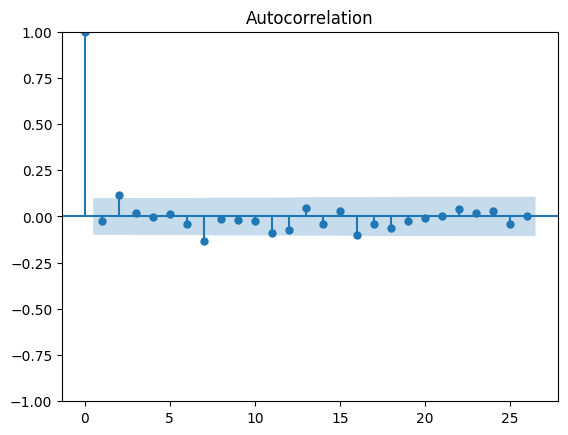

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.show()

# Conclusion

This project successfully utilized the `SARIMA` model to forecast website traffic based on historical data. Key takeaways include:

**Seasonality and Trends:**

* The data exhibited clear weekly seasonality and a long-term upward trend in website traffic.
* These patterns were effectively captured by the SARIMA model, particularly the seasonal moving average terms.

**Model Diagnostics:**

* The residual diagnostics showed that the model adequately captured the main patterns in the data, with residuals resembling white noise.
* However, a few residual outliers indicated unexplained deviations, possibly due to external factors like holidays or promotions.

**Forecasting Performance:**

* The forecast aligned well with observed seasonal patterns, demonstrating the model’s ability to provide reliable predictions.
* This makes it a valuable tool for planning traffic-based strategies, such as resource allocation and marketing campaigns.

**Future Improvements:**

* Incorporating external factors (e.g., holidays, events) as explanatory variables could further enhance model accuracy.
* Refining parameters and addressing residual outliers will ensure better convergence and more reliable predictions.

By leveraging SARIMA, this analysis provides actionable insights into website traffic behavior, enabling better decision-making and planning for future growth.